# Q1. Install and load the latest versions of TensorFlow and Keras. Print their versions.
___

In [1]:
import tensorflow as tf
import keras

In [2]:
print(f'Tensorflow Version {tf.__version__}')

Tensorflow Version 2.13.0


In [3]:
print(f'Keras Version {keras.__version__}')

Keras Version 2.13.1


# Q2. Load the Wine Quality dataset and explore its dimensions. 
___

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
wines = pd.read_csv('wine_quality_dataset.csv')

In [6]:
wines.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,bad
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,bad
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,bad
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,good
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,bad


In [7]:
wines.shape

(1599, 12)

In [8]:
wines.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   object 
dtypes: float64(11), object(1)
memory usage: 150.0+ KB


In [9]:
wines.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000


In [10]:
corr_metrics = wines.corr(method='spearman',numeric_only=True)
corr_metrics

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
fixed acidity,1.000000,-0.278282,0.661708,0.220701,0.250904,-0.175137,-0.088417,0.623071,-0.706674,0.212654,-0.066576
volatile acidity,-0.278282,1.000000,-0.610259,0.032386,0.158770,0.021163,0.094110,0.025014,0.233572,-0.325584,-0.224932
citric acid,0.661708,-0.610259,1.000000,0.176417,0.112577,-0.076452,0.009400,0.352285,-0.548026,0.331074,0.096456
residual sugar,0.220701,0.032386,0.176417,1.000000,0.212959,0.074618,0.145375,0.422266,-0.089971,0.038332,0.116548
chlorides,0.250904,0.158770,0.112577,0.212959,1.000000,0.000805,0.130033,0.411390,-0.234361,0.020825,-0.284504
free sulfur dioxide,-0.175137,0.021163,-0.076452,0.074618,0.000805,1.000000,0.789698,-0.041178,0.115679,0.045862,-0.081367
total sulfur dioxide,-0.088417,0.094110,0.009400,0.145375,0.130033,0.789698,1.000000,0.129332,-0.009841,-0.000504,-0.257806
density,0.623071,0.025014,0.352285,0.422266,0.411390,-0.041178,0.129332,1.000000,-0.312055,0.161478,-0.462445
pH,-0.706674,0.233572,-0.548026,-0.089971,-0.234361,0.115679,-0.009841,-0.312055,1.000000,-0.080306,0.179932
sulphates,0.212654,-0.325584,0.331074,0.038332,0.020825,0.045862,-0.000504,0.161478,-0.080306,1.000000,0.207330


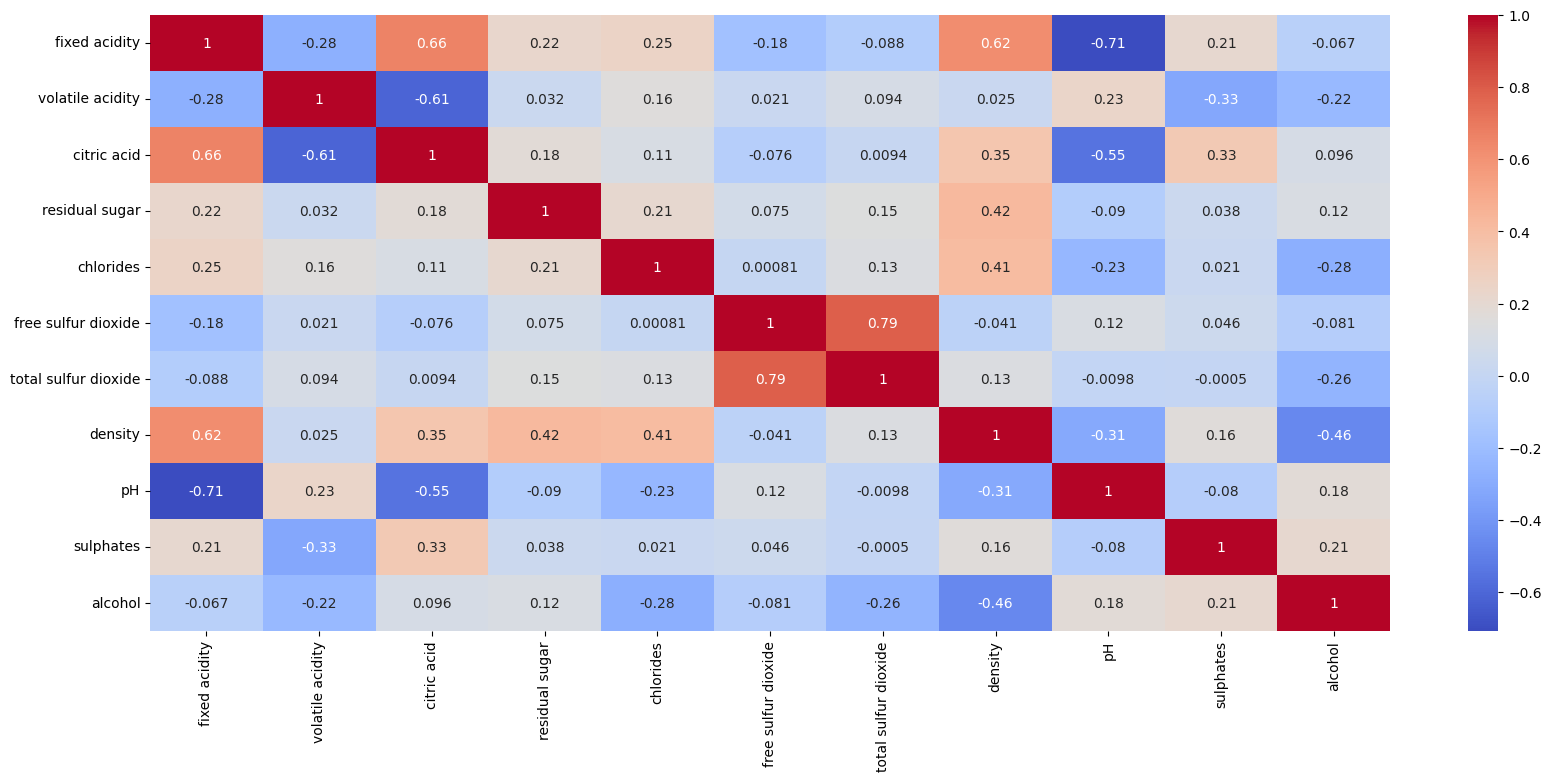

In [11]:
plt.figure(figsize=(20,8))
sns.heatmap(corr_metrics, annot=True, cmap='coolwarm')
plt.show()

# Q3. Check for null values, identify categorical variables, and encode them.
___

In [12]:
wines.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [13]:
# Label Encoding
from sklearn.preprocessing import LabelBinarizer
lb = LabelBinarizer()
wines['quality'] = lb.fit_transform(wines['quality'])

In [14]:
wines.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0


# Q4. Separate the features and target variables from the dataset.
___

In [15]:
X = wines.drop('quality', axis=1)
y = wines.quality

# Q5. Perform a train-test split, dividing the data into training, validation, and test datasets.
___

In [16]:
from sklearn.model_selection import train_test_split
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, test_size=0.20, random_state=42)

In [17]:
print(X_train_full.shape, y_train_full.shape) # Full Training Set

(1279, 11) (1279,)


In [18]:
print(X_test.shape, y_test.shape) # Test Set

(320, 11) (320,)


In [19]:
print(X_train.shape, y_train.shape) # Training Set

(1023, 11) (1023,)


In [20]:
print(X_valid.shape, y_valid.shape) # Validation Set

(256, 11) (256,)


# Q6. Scale the dataset using an appropriate scaling technique.
___

In [21]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

# Q7. Design and implement at least two hidden layers and an output layer for the binary categorical variables.
___

In [22]:
from keras.layers import InputLayer,Dense

In [23]:
# defining input neurons
input_neurons = X_train.shape[1]
input_neurons

11

In [24]:
# defining number of output neurons
output_neurons = len(np.unique(y_train))
output_neurons

2

In [25]:
# defining hidden layers and neurons in each layer
number_of_hidden_layers = 2
neuron_hidden_layer_1 = 10
neuron_hidden_layer_2 = 5

# Q8. Create a Sequential model in Keras and add the previously designed layers to it.
___

In [45]:
from keras.models import Sequential

In [46]:
model = Sequential()
model.add(InputLayer(input_shape=(input_neurons,)))
model.add(Dense(units=neuron_hidden_layer_1, activation='elu'))
model.add(Dense(units=neuron_hidden_layer_2, activation='elu'))
model.add(Dense(units=output_neurons, activation='tanh'))

# Q9. Print the summary of the model architecture.
___

In [47]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 10)                120       
                                                                 
 dense_4 (Dense)             (None, 5)                 55        
                                                                 
 dense_5 (Dense)             (None, 2)                 12        
                                                                 
Total params: 187 (748.00 Byte)
Trainable params: 187 (748.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


# Q10. Set the loss function(‘binary_crossentropy’), optimizer, and include the accuracy metric in the model.
___

In [48]:
LOSS = 'binary_crossentropy'
OPTIMIZER = 'adam'
METRICS = ['accuracy']

# Q11. Compile the model with the specified loss function, optimizer, and metrics.
___

In [49]:
model.compile(loss=LOSS, optimizer=OPTIMIZER, metrics=METRICS)

# Q12. Fit the model to the training data using appropriate batch size and number of epochs.
___

In [50]:
model_history = model.fit(X_train, y_train, validation_data=(X_valid, y_valid), epochs=100,batch_size=32)

Epoch 1/100
32/32 [==============================] - 1s 5ms/step - loss: 2.9521 - accuracy: 0.5122 - val_loss: 2.5825 - val_accuracy: 0.5312
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 2.2910 - accuracy: 0.5034 - val_loss: 2.0825 - val_accuracy: 0.5156
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 1.8955 - accuracy: 0.5171 - val_loss: 1.7447 - val_accuracy: 0.5117
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 1.7270 - accuracy: 0.5122 - val_loss: 1.6381 - val_accuracy: 0.5039
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 1.5875 - accuracy: 0.5024 - val_loss: 1.5193 - val_accuracy: 0.4883
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 1.4238 - accuracy: 0.4721 - val_loss: 1.2934 - val_accuracy: 0.4805
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 1.2759 - accuracy: 0.4545 - val_loss: 1.2256 - val_accuracy: 0.4922
Epoch 8/100
3

Epoch 59/100
32/32 [==============================] - 0s 2ms/step - loss: 0.5547 - accuracy: 0.4682 - val_loss: 0.6305 - val_accuracy: 0.5117
Epoch 60/100
32/32 [==============================] - 0s 2ms/step - loss: 0.5535 - accuracy: 0.4643 - val_loss: 0.6288 - val_accuracy: 0.5195
Epoch 61/100
32/32 [==============================] - 0s 2ms/step - loss: 0.5523 - accuracy: 0.4633 - val_loss: 0.6144 - val_accuracy: 0.5156
Epoch 62/100
32/32 [==============================] - 0s 2ms/step - loss: 0.5511 - accuracy: 0.4604 - val_loss: 0.6102 - val_accuracy: 0.5195
Epoch 63/100
32/32 [==============================] - 0s 2ms/step - loss: 0.5500 - accuracy: 0.4614 - val_loss: 0.6065 - val_accuracy: 0.5234
Epoch 64/100
32/32 [==============================] - 0s 2ms/step - loss: 0.5491 - accuracy: 0.4633 - val_loss: 0.6026 - val_accuracy: 0.5234
Epoch 65/100
32/32 [==============================] - 0s 2ms/step - loss: 0.5480 - accuracy: 0.4663 - val_loss: 0.6020 - val_accuracy: 0.5234
Epoch 

# Q13. Obtain the model's parameters (weights and biases).
___

In [51]:
print(model.weights)

[<tf.Variable 'dense_3/kernel:0' shape=(11, 10) dtype=float32, numpy=
array([[-0.2480356 , -0.26047733,  0.36546412, -0.40287653,  0.1941314 ,
         0.01513656,  0.4248525 ,  0.06023916, -0.36852935, -0.09220807],
       [ 0.700733  , -0.39769307,  0.5339761 ,  0.14095215,  0.05025923,
         0.34747118, -0.35176888, -0.66716033, -0.17224237,  0.1413081 ],
       [ 0.11921073,  0.3866134 , -0.3435421 ,  0.09194848,  0.19442306,
        -0.20843163, -0.13551112,  0.07777275,  0.2213804 ,  0.17876308],
       [ 0.29271266,  0.09116299,  0.2738735 , -0.05399635,  0.2812902 ,
         0.2200455 , -0.37774476, -0.27978253,  0.23538545, -0.03391093],
       [-0.16836725,  0.31832558, -0.20044209,  0.09386306, -0.30950996,
        -0.23931232,  0.0617473 , -0.12587716, -0.18408194, -0.1180987 ],
       [-0.35088602, -0.05169186, -0.11810967, -0.2071885 , -0.21139467,
         0.12535688,  0.15255234, -0.33835325, -0.01023048, -0.1789697 ],
       [-0.05657115,  0.42132872, -0.04787792,  

# Q14. Store the model's training history as a Pandas DataFrame.
___

In [52]:
model_history_df = pd.DataFrame(model_history.history)

In [53]:
model_history_df.head()

,loss,accuracy,val_loss,val_accuracy
0,2.952073,0.512219,2.582546,0.531250
1,2.290976,0.503421,2.082515,0.515625
2,1.895492,0.517107,1.744652,0.511719
3,1.727011,0.512219,1.638128,0.503906
4,1.587526,0.502444,1.519258,0.488281


# Q15. Plot the training history (e.g., accuracy and loss) using suitable visualization techniques.
___

### Visualizing history for loss

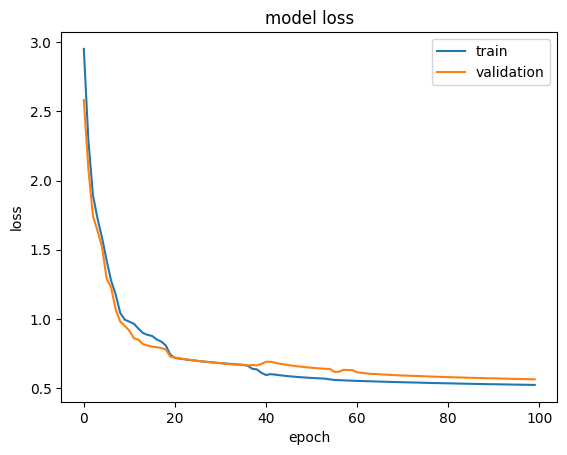

In [54]:
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

### Visualizing history for accuracy

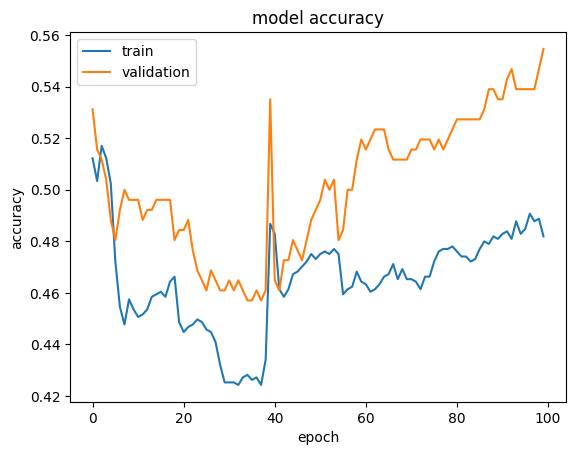

In [55]:
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

# Q16. Evaluate the model's performance using the test dataset and report relevant metrics.
___

In [56]:
y_pred_probabilities = model.predict(X_test)

10/10 [==============================] - 0s 2ms/step


In [57]:
y_pred_probabilities

array([[ 0.3613841 ,  0.27568218],
       [ 0.22306035,  0.24466656],
       [ 0.6348709 ,  0.587867  ],
       [ 0.26944053,  0.30602866],
       [ 0.6925013 ,  0.7053276 ],
       [ 0.12780674,  0.19813678],
       [ 0.24617828,  0.23155785],
       [ 0.15066032,  0.21337758],
       [ 0.7196709 ,  0.6937669 ],
       [ 0.7203061 ,  0.75083256],
       [ 0.82483447,  0.7922496 ],
       [ 0.45169273,  0.46825856],
       [ 0.5313378 ,  0.49575537],
       [ 0.23256718,  0.23583426],
       [ 0.35610312,  0.37805164],
       [ 0.94842917,  0.95263726],
       [ 0.24005468,  0.16380425],
       [ 0.49899676,  0.49423984],
       [ 0.9460663 ,  0.93744653],
       [ 0.45778686,  0.32027015],
       [ 0.270401  ,  0.32864097],
       [ 0.24627137,  0.26051703],
       [ 0.83712095,  0.86750597],
       [ 0.92010677,  0.9315881 ],
       [ 0.43559742,  0.46373907],
       [ 0.49197176,  0.504012  ],
       [ 0.8647983 ,  0.7998468 ],
       [ 0.48540017,  0.48597378],
       [ 0.27005416,

In [58]:
# Converting predicted probabilities to class labels
y_pred_labels = np.argmax(y_pred_probabilities, axis=1)

In [59]:
y_pred_labels

array([0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,

### Evaluating model's performance

In [60]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [61]:
print(f'Accuracy: {accuracy_score(y_test,y_pred_labels)*100} %')

Accuracy: 49.6875 %


In [62]:
print('Confusion Matirix:')
print(confusion_matrix(y_test,y_pred_labels))

Confusion Matirix:
[[ 59  82]
 [ 79 100]]


In [63]:
print('Classification Report:')
print(classification_report(y_test,y_pred_labels))

Classification Report:
              precision    recall  f1-score   support

           0       0.43      0.42      0.42       141
           1       0.55      0.56      0.55       179

    accuracy                           0.50       320
   macro avg       0.49      0.49      0.49       320
weighted avg       0.50      0.50      0.50       320

